## Capstone- Cancer Histopathology: CNN Mark Models

Dataset:
- A. Borkowski, "Lung and Colon Cancer Histopathological Images", Kaggle.com, 2020. [Online]. Available: https://www.kaggle.com/datasets/andrewmvd/lung-and-colon-cancer-histopathological-images. [Accessed: 30- Jul- 2022].

Sources:
- Borkowski AA, Bui MM, Thomas LB, Wilson CP, DeLand LA, Mastorides SM. Lung and Colon Cancer Histopathological Image Dataset (LC25000). arXiv:1912.12142v1 [eess.IV], 2019

Image Labels:
- Lung benign tissue: 3
- Lung adenocarcinoma: 2
- Lung squamous cell carcinoma: 4
- Colon adenocarcinoma: 0
- Colon benign tissue: 1

### Import Libraries

In [1]:
## Import Libraries
import numpy as np
import pandas as pd
import re as regex
from pathlib import Path
import time
import math

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns

from sklearn.svm import SVC

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import classification_report

import string
from collections import Counter

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC

# import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import Flatten
from keras.utils import to_categorical
from tensorflow.keras import datasets, layers, models

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

### Load Data

In [2]:
import PIL
from PIL import Image
import glob
import os, os.path
from numpy import asarray

import keras
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import array_to_img
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

from IPython.display import display, HTML
import pymongo
from pymongo import MongoClient
import io
from bson.binary import Binary

In [3]:
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from keras.models import Model, Sequential
from keras.applications.xception import Xception
from keras.applications import *
from keras.callbacks import EarlyStopping
from keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.applications.resnet50 import ResNet50
from keras.applications.vgg19 import VGG19
from keras.applications.inception_v3 import InceptionV3
from keras.applications.mobilenet import MobileNet
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.wrappers.scikit_learn import KerasClassifier
from scikeras.wrappers import KerasRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from keras.layers import BatchNormalization
from keras.models import load_model

In [4]:
%%time
dfShuffledData= pd.DataFrame(np.load('shufGenData96.npy', allow_pickle= True),
                             columns=['imageVector', 'label', 'classLabel', 'image', 'labelName'])
dfShuffledData.head()

CPU times: total: 3.52 s
Wall time: 28 s


,imageVector,label,classLabel,image,labelName
0,"[[[0.9960785, 0.98823535, 0.9921569], [0.98823...","[1.0, 0.0, 0.0, 0.0, 0.0]",0,<PIL.Image.Image image mode=RGB size=96x96 at ...,colon_aca
1,"[[[0.98823535, 0.97647065, 0.9568628], [0.8470...","[1.0, 0.0, 0.0, 0.0, 0.0]",0,<PIL.Image.Image image mode=RGB size=96x96 at ...,colon_aca
2,"[[[0.79215693, 0.6745098, 0.96470594], [0.7647...","[0.0, 0.0, 1.0, 0.0, 0.0]",2,<PIL.Image.Image image mode=RGB size=96x96 at ...,lung_aca
3,"[[[0.83921576, 0.5647059, 0.7686275], [0.85882...","[0.0, 0.0, 0.0, 1.0, 0.0]",3,<PIL.Image.Image image mode=RGB size=96x96 at ...,lung_n
4,"[[[0.40000004, 0.21176472, 0.7411765], [0.1647...","[0.0, 0.0, 0.0, 0.0, 1.0]",4,<PIL.Image.Image image mode=RGB size=96x96 at ...,lung_scc


In [5]:
def originSize(image):
    imgVect= image * 255.0
    return imgVect

In [6]:
%%time
dfShuffledData['originSize']= dfShuffledData['imageVector'].apply(originSize)

CPU times: total: 58.7 s
Wall time: 58.7 s


In [7]:
dfShuffledData.head()

,imageVector,label,classLabel,image,labelName,originSize
0,"[[[0.9960785, 0.98823535, 0.9921569], [0.98823...","[1.0, 0.0, 0.0, 0.0, 0.0]",0,<PIL.Image.Image image mode=RGB size=96x96 at ...,colon_aca,"[[[254.00002, 252.00002, 253.00002], [252.0000..."
1,"[[[0.98823535, 0.97647065, 0.9568628], [0.8470...","[1.0, 0.0, 0.0, 0.0, 0.0]",0,<PIL.Image.Image image mode=RGB size=96x96 at ...,colon_aca,"[[[252.00002, 249.00002, 244.00002], [216.0000..."
2,"[[[0.79215693, 0.6745098, 0.96470594], [0.7647...","[0.0, 0.0, 1.0, 0.0, 0.0]",2,<PIL.Image.Image image mode=RGB size=96x96 at ...,lung_aca,"[[[202.00002, 172.0, 246.00002], [195.00002, 1..."
3,"[[[0.83921576, 0.5647059, 0.7686275], [0.85882...","[0.0, 0.0, 0.0, 1.0, 0.0]",3,<PIL.Image.Image image mode=RGB size=96x96 at ...,lung_n,"[[[214.00002, 144.0, 196.00002], [219.00002, 1..."
4,"[[[0.40000004, 0.21176472, 0.7411765], [0.1647...","[0.0, 0.0, 0.0, 0.0, 1.0]",4,<PIL.Image.Image image mode=RGB size=96x96 at ...,lung_scc,"[[[102.00001, 54.000004, 189.0], [42.0, 0.0, 1..."


In [8]:
%%time
imgVectData= np.array(dfShuffledData['originSize'].tolist())
imgVectData.shape

CPU times: total: 828 ms
Wall time: 831 ms


(25000, 96, 96, 3)

In [9]:
%%time
imgVectData01= np.array(dfShuffledData['imageVector'].tolist())
imgVectData01.shape

CPU times: total: 8.91 s
Wall time: 9.64 s


(25000, 96, 96, 3)

In [10]:
labelData01= np.array(dfShuffledData['label'].tolist())
labelData01.shape

(25000, 5)

### Prepare data

In [11]:
# Prepare input data
X= imgVectData
X2= imgVectData01

# output
y= labelData01.astype(np.uint8)

In [12]:
%%time
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.3, random_state= 65)
X2_train, X2_test, y2_train, y2_test= train_test_split(X2, y, test_size= 0.3, random_state= 65)

CPU times: total: 13.6 s
Wall time: 24 s


In [13]:
X_train.shape

(17500, 96, 96, 3)

In [14]:
X_test.shape

(7500, 96, 96, 3)

In [15]:
y_train.shape

(17500, 5)

### Create the model's architecture
- **NOTE ALERT**: Take into account the volume of data and parameters. Time and processing escalate quite fast.
- **NOTE ALERT**: It is likely this data will require more complex models.

### Fit the training data

In [16]:
X2_train.shape

(17500, 96, 96, 3)

In [17]:
y2_train.shape

(17500, 5)

In [18]:
def fit_cnnMod03(X_train, y_train, epochs= 10):
    es= EarlyStopping(monitor= 'val_loss', mode= 'min', verbose= 1, patience= 5)
    model= Sequential()
    model.add(layers.Conv2D(64, (3, 3), activation='relu', data_format = 'channels_last',
                        padding = 'valid',input_shape=(96, 96, 3)))
    model.add(layers.MaxPooling2D((5, 5)))
    model.add(layers.Conv2D(32, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(32, (3, 3), activation='relu'))
    model.add(layers.Flatten())
#     model.add(layers.Dense(32, activation='relu'))
#     model.add(layers.Dropout(0.2))
    model.add(layers.Dense(5, activation='softmax'))
    print(model.summary())
    
    model.compile(loss= 'categorical_crossentropy', optimizer='adam', metrics= ['accuracy'])

    history= model.fit(X_train, y_train, validation_split= 0.3, epochs= epochs, batch_size= 20,
                       verbose= 1, callbacks= [es])
    return [model, history]

In [56]:
def fit_cnnMod04(X_train, y_train, epochs= 10):
    es= EarlyStopping(monitor= 'val_loss', mode= 'min', verbose= 1, patience= 5)
    model= Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation= 'relu', data_format= 'channels_last',
                            padding= 'valid' ,input_shape= (96, 96, 3)))
    model.add(layers.MaxPooling2D((5, 5)))
    model.add(layers.Conv2D(16, (3, 3), activation= 'relu'))
    model.add(BatchNormalization(momentum= 0.01))
#     model.add(layers.Dropout(0.2))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(16, (3, 3), activation= 'relu'))
    model.add(layers.Flatten())
#     model.add(layers.Dense(16, activation='relu'))
#     model.add(layers.Dropout(0.2))
    model.add(layers.Dense(5, activation='softmax'))
    print(model.summary())
    
    model.compile(loss= 'categorical_crossentropy', optimizer='adam', metrics= ['accuracy'])

    history= model.fit(X_train, y_train, validation_split= 0.3, epochs= epochs, batch_size= 20,
                       verbose= 1, callbacks= [es])
    return [model, history]

In [90]:
def fit_cnnMod05(X_train, y_train, epochs= 15):
    es= EarlyStopping(monitor= 'val_loss', mode= 'min', verbose= 1, patience= 5)
    model= Sequential()
    model.add(layers.Conv2D(64, (3, 3), activation='relu', data_format = 'channels_last',
                        padding = 'valid',input_shape=(96, 96, 3)))
    model.add(layers.MaxPooling2D((5, 5)))
    model.add(layers.Conv2D(32, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(32, (3, 3), activation='relu'))
    model.add(layers.Flatten())
    model.add(layers.Dense(32, activation='relu'))
#     model.add(layers.Dropout(0.2))
    model.add(layers.Dense(5, activation='softmax'))
    print(model.summary())
    
    model.compile(loss= 'categorical_crossentropy', optimizer='adam', metrics= ['accuracy'])

    history= model.fit(X_train, y_train, validation_split= 0.3, epochs= epochs, batch_size= 20,
                       verbose= 1, callbacks= [es])
    return [model, history]

In [16]:
modelTag= ['VGG16', 'VGG19', 'ResNet50', 'Xception', 'InceptionV3', 'cnnMk03', 'cnnMk04',
           'cnnMk05', 'cnnMk06']
imageTag= []
for i in range(25, 35):
    if (i <= 9):
        img= f'image0{i}'
        imageTag.append(img)
    else:
        img= f'image{i}'
        imageTag.append(img)
imageTag

['image25',
 'image26',
 'image27',
 'image28',
 'image29',
 'image30',
 'image31',
 'image32',
 'image33',
 'image34']

In [52]:
def visualCostPlot(histMod, modelTag, imageTag):
    fig, ax = plt.subplots(1, 2, figsize = (18, 6))
    fig.subplots_adjust(left = 0.02, right = 0.98, wspace = 0.2)

    plt.rcParams.update({'font.size': 18})

    # Plot training & validation accuracy values
    ax[0].plot(histMod.history['accuracy'], label = 'Training')
    ax[0].plot(histMod.history['val_accuracy'], label = 'Validation')
    ax[0].set_title(f'Model accuracy ({modelTag})')
    ax[0].set_ylabel('Accuracy')
    ax[0].set_xlabel('Epoch')
    ax[0].legend()

    # Plot training & validation loss values
    ax[1].plot(histMod.history['loss'], label = 'Training')
    ax[1].plot(histMod.history['val_loss'], label = 'Validation')
    ax[1].set_title(f'Model loss ({modelTag})')
    ax[1].set_ylabel('Loss')
    ax[1].set_xlabel('Epoch')
    ax[1].legend()
    plt.savefig(f'{imageTag}.png', facecolor='w', bbox_inches="tight",
            pad_inches=0.3, transparent=True)
    plt.show()

#### cnnMk03 Fit & Visualisation of cost

In [60]:
%%time
tic02= time.time()
cnnMkMod03= fit_cnnMod03(X2_train, y2_train)
toc02= time.time()
runTimeFit02= (toc02-tic02)*1000

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_45 (Conv2D)          (None, 94, 94, 64)        1792      
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 18, 18, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_46 (Conv2D)          (None, 16, 16, 32)        18464     
                                                                 
 max_pooling2d_31 (MaxPoolin  (None, 8, 8, 32)         0         
 g2D)                                                            
                                                                 
 conv2d_47 (Conv2D)          (None, 6, 6, 32)          9248      
                                                                 
 flatten_15 (Flatten)        (None, 1152)            

In [61]:
cnnMkMod03[0].save('cnnMkMod03.h5')

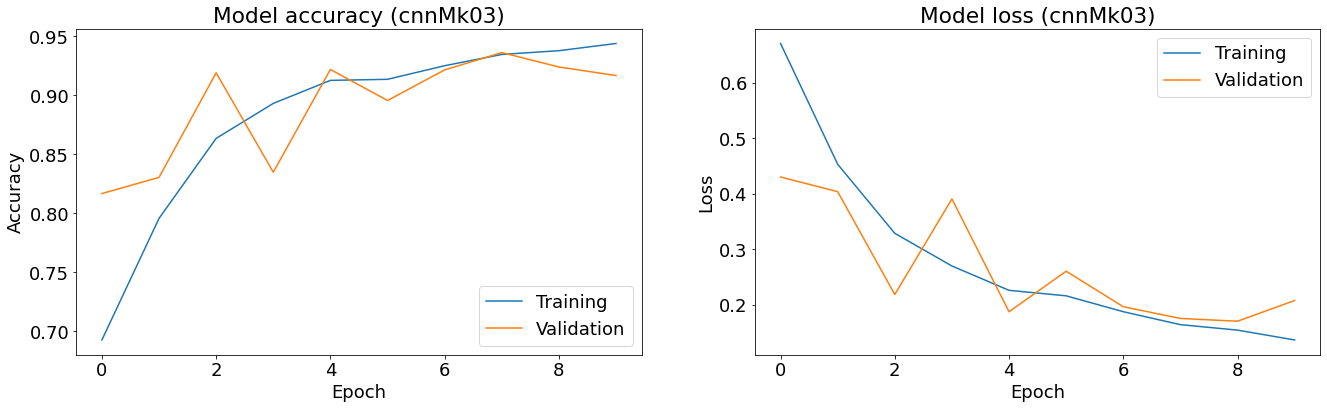

In [62]:
cnnMk03Cost= visualCostPlot(cnnMkMod03[1], modelTag[5], imageTag[0])

#### cnnMk04 Fit & Visualisation of cost

In [57]:
%%time
tic01= time.time()
cnnMkMod04= fit_cnnMod04(X2_train, y2_train)
toc01= time.time()
runTimeFit01= (toc01-tic01)*1000

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_42 (Conv2D)          (None, 94, 94, 32)        896       
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 18, 18, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_43 (Conv2D)          (None, 16, 16, 16)        4624      
                                                                 
 batch_normalization_13 (Bat  (None, 16, 16, 16)       64        
 chNormalization)                                                
                                                                 
 max_pooling2d_29 (MaxPoolin  (None, 8, 8, 16)         0         
 g2D)                                                            
                                                     

In [58]:
cnnMkMod04[0].save('cnnMkMod04.h5')

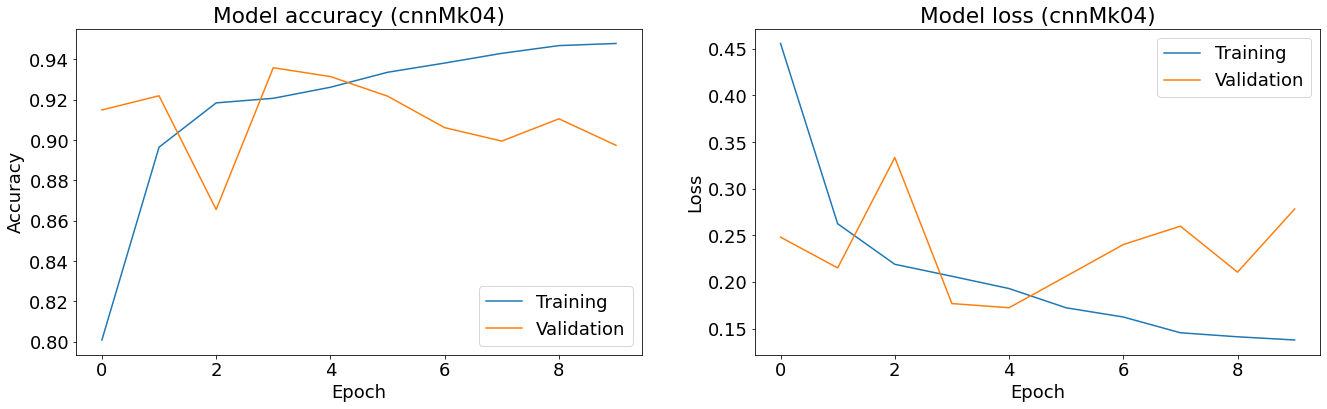

In [59]:
cnnMk04Cost= visualCostPlot(cnnMkMod04[1], modelTag[6], imageTag[1])

#### cnnMk05 Fit & Visualisation of cost

In [92]:
%%time
tic03= time.time()
cnnMkMod05= fit_cnnMod05(X2_train, y2_train, epochs= 10)
toc03= time.time()
runTimeFit03= (toc03-tic03)*1000

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_54 (Conv2D)          (None, 94, 94, 64)        1792      
                                                                 
 max_pooling2d_36 (MaxPoolin  (None, 18, 18, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_55 (Conv2D)          (None, 16, 16, 32)        18464     
                                                                 
 max_pooling2d_37 (MaxPoolin  (None, 8, 8, 32)         0         
 g2D)                                                            
                                                                 
 conv2d_56 (Conv2D)          (None, 6, 6, 32)          9248      
                                                                 
 flatten_18 (Flatten)        (None, 1152)            

In [93]:
cnnMkMod05[0].save('cnnMkMod05.h5')

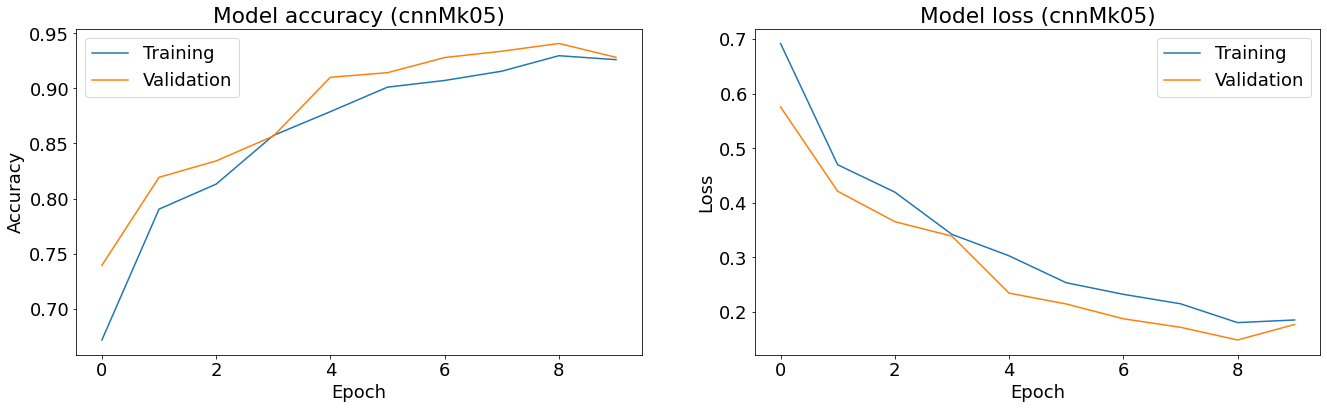

In [94]:
cnnMk05Cost= visualCostPlot(cnnMkMod05[1], modelTag[7], imageTag[2])

#### cnnMk06 Fit & Visualisation of cost

In [95]:
%%time
tic04= time.time()
cnnMkMod06= fit_cnnMod05(X2_train, y2_train)
toc04= time.time()
runTimeFit04= (toc04-tic04)*1000

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_57 (Conv2D)          (None, 94, 94, 64)        1792      
                                                                 
 max_pooling2d_38 (MaxPoolin  (None, 18, 18, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_58 (Conv2D)          (None, 16, 16, 32)        18464     
                                                                 
 max_pooling2d_39 (MaxPoolin  (None, 8, 8, 32)         0         
 g2D)                                                            
                                                                 
 conv2d_59 (Conv2D)          (None, 6, 6, 32)          9248      
                                                                 
 flatten_19 (Flatten)        (None, 1152)            

In [110]:
cnnMkMod06[0].save('cnnMkMod06.h5')

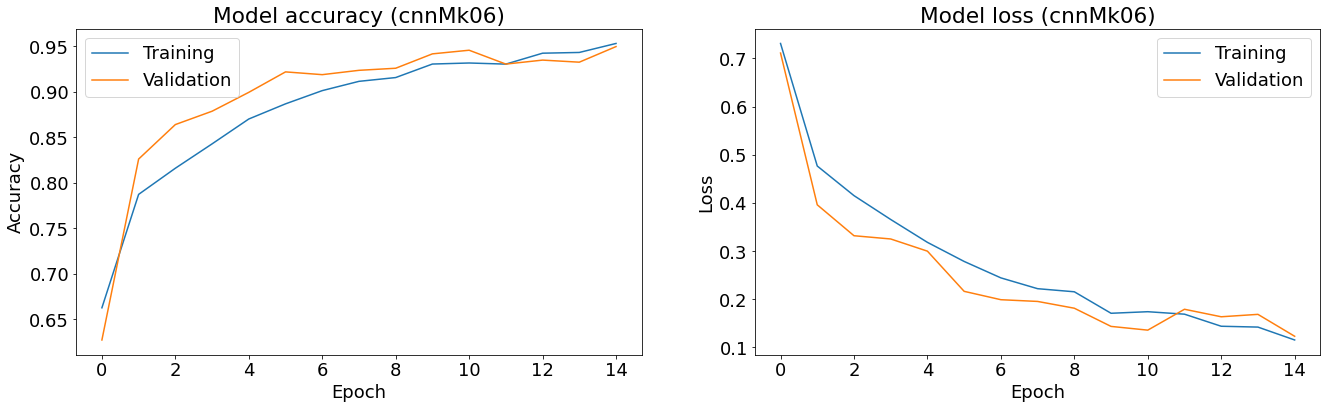

In [99]:
cnnMk06Cost= visualCostPlot(cnnMkMod06[1], modelTag[8], imageTag[3])

### Create Predictions

In [17]:
fitTimeArr= np.load('preTrainFitTime.npy')

In [18]:
cnnMk01= load_model('cnnMkMod01.h5')
cnnMk02= load_model('cnnMkMod02.h5')
cnnMk03= load_model('cnnMkMod03.h5')
cnnMk04= load_model('cnnMkMod04.h5')
cnnMk05= load_model('cnnMkMod05.h5')
cnnMk06= load_model('cnnMkMod06.h5')
vgg16Model= load_model('vgg16Mod.h5')
vgg19Model= load_model('vgg19Mod.h5')
xceptionModel= load_model('xceptionMod.h5')
inceptionV3Model= load_model('inceptionV3Mod.h5')

In [19]:
%%time
# predictions = model.predict_classes(X_test)
cnnMk06predict_x= cnnMk06.predict(X2_test) 
# classes_x= np.argmax(predict_x, axis=1)
cnnMk06classes_x= cnnMk06predict_x.argmax(axis= 1)

235/235 [==============================] - 33s 136ms/step
CPU times: total: 1min 10s
Wall time: 33.7 s


In [29]:
%%time
# predictions = model.predict_classes(X_test)
vgg16predict_x= vgg16Model.predict(X_test) 
# classes_x= np.argmax(predict_x, axis=1)
vgg16classes_x= vgg16predict_x.argmax(axis= 1)

235/235 [==============================] - 332s 1s/step
CPU times: total: 34min 58s
Wall time: 5min 32s


### Evaluate the model

In [20]:
%%time
tic05= time.time()
cnnMk06Score= cnnMk06.evaluate(X2_test, y2_test, batch_size= 10)
print('\nTest loss: %.6f, Test accuracy: %.6f' % tuple(cnnMk06Score))
toc05= time.time()
cnnMk06RunTimeEval= (toc05-tic05)*1000

750/750 [==============================] - 79s 104ms/step - loss: 0.1200 - accuracy: 0.9509

Test loss: 0.120031, Test accuracy: 0.950933
CPU times: total: 1min 57s
Wall time: 1min 19s


In [30]:
%%time
tic06= time.time()
vgg16Score= vgg16Model.evaluate(X_test, y_test, batch_size= 10)
print('\nTest loss: %.6f, Test accuracy: %.6f' % tuple(vgg16Score))
toc06= time.time()
vgg16RunTimeEval= (toc06-tic06)*1000

750/750 [==============================] - 389s 519ms/step - loss: 0.7987 - accuracy: 0.9607

Test loss: 0.798685, Test accuracy: 0.960667
CPU times: total: 33min 23s
Wall time: 6min 29s


In [21]:
def print_cm(cm):
    d_size= max(len('%d' % cm.max()), len('%d' % cm.shape[1]))
    if min(cm.shape) > 10: # make sparse
        print('Sparse Matrix (*=diagonal)')
        fmt_r= 'r%%0%dd' % d_size
        fmt_c= ', c%%0%dd%%s= %%%dd' % (d_size, d_size)
        for i in range(cm.shape[0]):
            s= fmt_r % i
            for j in range(cm.shape[1]):
                if cm[i, j] > 0:
                    s += fmt_c % (j, '*' if i == j else ' ', cm[i, j])
            print(s)
    else: # make dense
        c= '%%%dd ' % d_size
        s= '%s| ' % (' ' * d_size)
        s += ''.join([c % i for i in range(len(cm[0]))])
        print(s)
        print('-' * len(s))
        for i, r in enumerate(cm):
            s= '%2d| ' % i
            s += c * len(r)
            print(s % tuple(r))

In [22]:
y2_test_target= np.array([x.argmax() for x in y2_test])
cm= confusion_matrix(y2_test_target, cnnMk06classes_x)
print_cm(cm)

    |    0    1    2    3    4 
-------------------------------
 0| 1475   72    0    0    0 
 1|   38 1449    0    0    0 
 2|   25    0 1341    4  136 
 3|    1    0   10 1492    0 
 4|    1    0   81    0 1375 


In [31]:
y_test_target= np.array([x.argmax() for x in y_test])
cm02= confusion_matrix(y_test_target, vgg16classes_x)
print_cm(cm02)

    |    0    1    2    3    4 
-------------------------------
 0| 1528    4   13    0    2 
 1|   41 1446    0    0    0 
 2|   22    0 1334    3  147 
 3|    0    0    9 1494    0 
 4|    2    0   52    0 1403 


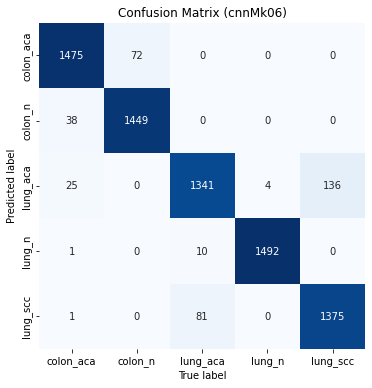

In [23]:
confuseLabels= ('colon_aca', 'colon_n', 'lung_aca', 'lung_n', 'lung_scc')
# plot
fig, ax = plt.subplots(1, 1, figsize = (8, 6))
fig.subplots_adjust(left = 0.02, right = 0.98, wspace = 0.2)
# Confusion Matrix
sns.heatmap(cm, square= True, annot= True, fmt= 'd', cbar= False, cmap= 'Blues', ax= ax,
           xticklabels= confuseLabels, yticklabels= confuseLabels)

ax.set_title(f'Confusion Matrix (cnnMk06)')
ax.set_xlabel('True label')
ax.set_ylabel('Predicted label')
    
plt.savefig(f'{imageTag[4]}.png', facecolor='w', bbox_inches="tight",
        pad_inches=0.3, transparent=True)

plt.show()

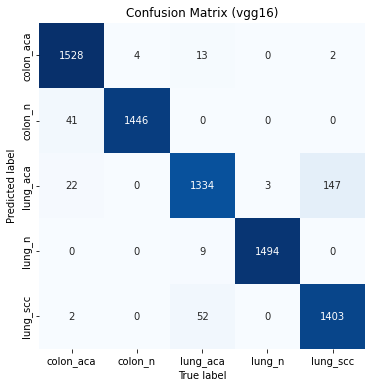

In [32]:
confuseLabels= ('colon_aca', 'colon_n', 'lung_aca', 'lung_n', 'lung_scc')
# plot
fig, ax = plt.subplots(1, 1, figsize = (8, 6))
fig.subplots_adjust(left = 0.02, right = 0.98, wspace = 0.2)
# Confusion Matrix
sns.heatmap(cm02, square= True, annot= True, fmt= 'd', cbar= False, cmap= 'Blues', ax= ax,
           xticklabels= confuseLabels, yticklabels= confuseLabels)

ax.set_title(f'Confusion Matrix (vgg16)')
ax.set_xlabel('True label')
ax.set_ylabel('Predicted label')
    
plt.savefig(f'{imageTag[5]}.png', facecolor='w', bbox_inches="tight",
        pad_inches=0.3, transparent=True)

plt.show()

In [24]:
%%time
# define 5-fold cross validation test harness
kfold= KFold(n_splits= 5, shuffle= True, random_state= 65)
cvScores= []
for train, test in kfold.split(X2_train, y2_train):
#     print(X[train].shape, y[train].shape)
    scores= cnnMk06.evaluate(X2[train], y[train], batch_size= 10, verbose= 1)
    print("%s: %.4f" % (cnnMk06.metrics_names[1], scores[1]))
    cvScores.append(scores[1])
meanAcc= np.mean(cvScores)
print(cvScores, meanAcc)
print("%.4f (+/- %.4f)" % (np.mean(cvScores), np.std(cvScores)))

1400/1400 [==============================] - 144s 102ms/step - loss: 0.1084 - accuracy: 0.9573
accuracy: 0.9573
1400/1400 [==============================] - 118s 84ms/step - loss: 0.1102 - accuracy: 0.9571
accuracy: 0.9571
1400/1400 [==============================] - 121s 86ms/step - loss: 0.1135 - accuracy: 0.9546
accuracy: 0.9546
1400/1400 [==============================] - 106s 75ms/step - loss: 0.1088 - accuracy: 0.9581
accuracy: 0.9581
1400/1400 [==============================] - 130s 92ms/step - loss: 0.1094 - accuracy: 0.9569
accuracy: 0.9569
[0.9572857022285461, 0.9571428298950195, 0.9545714259147644, 0.958142876625061, 0.9568571448326111] 0.9567999958992004
0.9568 (+/- 0.0012)
CPU times: total: 16min 21s
Wall time: 10min 27s


In [25]:
cnnMk06ClassReport= classification_report(y2_test_target, cnnMk06classes_x)
print(cnnMk06ClassReport)

              precision    recall  f1-score   support

           0       0.96      0.95      0.96      1547
           1       0.95      0.97      0.96      1487
           2       0.94      0.89      0.91      1506
           3       1.00      0.99      0.99      1503
           4       0.91      0.94      0.93      1457

    accuracy                           0.95      7500
   macro avg       0.95      0.95      0.95      7500
weighted avg       0.95      0.95      0.95      7500



In [83]:
vgg16ClassReport= classification_report(y_test_target, vgg16classes_x)
print(vgg16ClassReport)

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1547
           1       1.00      0.97      0.98      1487
           2       0.95      0.89      0.92      1506
           3       1.00      0.99      1.00      1503
           4       0.90      0.96      0.93      1457

    accuracy                           0.96      7500
   macro avg       0.96      0.96      0.96      7500
weighted avg       0.96      0.96      0.96      7500



In [26]:
cnnMk06ClassReportDict= classification_report(y2_test_target, cnnMk06classes_x, output_dict= True)
cnnMk06ClassReportDict['1']['precision']

0.9526627218934911

In [27]:
arr01= []
for i in cnnMk06ClassReportDict['macro avg']:
    cnnMk06ClassMetric= cnnMk06ClassReportDict['macro avg'][i]
    arr01.append(cnnMk06ClassMetric)

arr01.append('cnnMk06')
arr01.append(cnnMk06RunTimeEval)
arr01.append(meanAcc)
arr01

[0.9508454057454099,
 0.9509486043354751,
 0.9506930575225516,
 7500,
 'cnnMk06',
 79068.87364387512,
 0.9567999958992004]